# What sells a car?

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.

goal of the project- this project we will learn what factors influance the price of a car. after we will download the data i'll check the structure of the data and mising values. after we clean the data we will try to study it and visualize that it will be easyer to see the influance and correlation between factors and then we will try to learn what influances the price of a car. my hypothesis is that not one factor alone makes the diffrence but a correlation between changing factors especially the age of the car and how mouch km it drove and how good shape is the car. now lets go study it. 

## Initialization

In [2]:

import pandas as pd
import numpy as np
from nltk.stem import SnowballStemmer

english_stemmer = SnowballStemmer('english')
import matplotlib.pyplot as plt


### Load data

In [3]:

data = pd.read_csv('/datasets/vehicles_us.csv')
print(data.head(10))

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   
5  14990      2014.0    chrysler 300  excellent        6.0  gas   57954.0   
6  12990      2015.0    toyota camry  excellent        4.0  gas   79212.0   
7  15990      2013.0     honda pilot  excellent        6.0  gas  109473.0   
8  11500      2012.0     kia sorento  excellent        4.0  gas  104174.0   
9   9200      2008.0     honda pilot  excellent        NaN  gas  147191.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automat

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [5]:
data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


from looking at the raw data information we can see we have 13 columns with no nulls, there is a lot of missing values in 5 columns that in is_4wd its missing half of the values. another issue that we can see is date posted that is object type and it needs to be date time type. 
days listed has a 0 that dosent makes sense. 

In [6]:
# using 'display' to output the result
display(data.head(10))

# the last line
data.describe()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal



In [7]:

print(data.head(20))


    price  model_year                     model  condition  cylinders fuel  \
0    9400      2011.0                    bmw x5       good        6.0  gas   
1   25500         NaN                ford f-150       good        6.0  gas   
2    5500      2013.0            hyundai sonata   like new        4.0  gas   
3    1500      2003.0                ford f-150       fair        8.0  gas   
4   14900      2017.0              chrysler 200  excellent        4.0  gas   
5   14990      2014.0              chrysler 300  excellent        6.0  gas   
6   12990      2015.0              toyota camry  excellent        4.0  gas   
7   15990      2013.0               honda pilot  excellent        6.0  gas   
8   11500      2012.0               kia sorento  excellent        4.0  gas   
9    9200      2008.0               honda pilot  excellent        NaN  gas   
10  19500      2011.0  chevrolet silverado 1500  excellent        8.0  gas   
11   8990      2012.0              honda accord  excellent      

After going over part of the data we can see a few Nans. columns of object should go throw lowerring that we wont have duplicates and easyer for categorizing and grouping.

In [8]:
data.loc[:,'date_posted'] = pd.to_datetime(data['date_posted'], format='%Y-%m-%d') 


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null datetime64[ns]
days_listed     51525 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 5.1+ MB


the date_posted column is a value of date but the dataset calld it object so we changed it to datetime type and then chcked that it realy was changed

In [10]:
data.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [11]:
data.isnull().sum()/ data.shape[0] * 100

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

our dataset as a lot of missing values, 5 columns have Nan with 4 columns that have more than 10%. the column with the most missing values is is_4wd with just more then half of values missing. odometer has 15% and that worrise me becuase that culd be a price influance so as model_year (7% missing). how bad is missing data on is_4wd? maybe its not so importendt and there for the publisher of the ad didnt know that detail but it could be a bolean and all the false became Nan. will check that out. 

In [12]:
data['price'].value_counts()

1         798
6995      719
5995      655
4995      624
3500      620
         ... 
49988       1
36600       1
300000      1
39873       1
11762       1
Name: price, Length: 3443, dtype: int64

In [13]:
(data['price'] < 150).value_counts() 

False    50659
True       866
Name: price, dtype: int64

isnt it wierd to sell a car for 1 dolar
because it's a small amount of data i wont get rid of it but i will put it as an outlier

In [14]:
data['model_year'].value_counts()

2013.0    3549
2012.0    3468
2014.0    3448
2011.0    3375
2015.0    3323
          ... 
1954.0       1
1949.0       1
1948.0       1
1936.0       1
1929.0       1
Name: model_year, Length: 68, dtype: int64

there are cars over 90 years old, it could be but it is an option

In [15]:
data['model'].str.lower()

0                bmw x5
1            ford f-150
2        hyundai sonata
3            ford f-150
4          chrysler 200
              ...      
51520     nissan maxima
51521       honda civic
51522    hyundai sonata
51523    toyota corolla
51524     nissan altima
Name: model, Length: 51525, dtype: object

In [16]:
data['model'].value_counts()

ford f-150                           2796
chevrolet silverado 1500             2171
ram 1500                             1750
chevrolet silverado                  1271
jeep wrangler                        1119
                                     ... 
ford f-250 super duty                 241
acura tl                              236
kia sorento                           236
nissan murano                         235
mercedes-benz benze sprinter 2500      41
Name: model, Length: 100, dtype: int64

i lowered the text that we wont have spelling duplicates, and now the data looks o.k. 

In [17]:
data['condition'].str.lower()

0             good
1             good
2         like new
3             fair
4        excellent
           ...    
51520     like new
51521      salvage
51522    excellent
51523         good
51524         good
Name: condition, Length: 51525, dtype: object

In [18]:
data['condition'].value_counts()

excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

i lowered the text that we wont have spelling duplicates, and now the data looks o.k. 

In [19]:
data['cylinders'].value_counts()

8.0     15844
6.0     15700
4.0     13864
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64

the data looks fine

In [20]:
data['fuel'].str.lower()

0        gas
1        gas
2        gas
3        gas
4        gas
        ... 
51520    gas
51521    gas
51522    gas
51523    gas
51524    gas
Name: fuel, Length: 51525, dtype: object

In [21]:
data['fuel'].value_counts()

gas         47288
diesel       3714
hybrid        409
other         108
electric        6
Name: fuel, dtype: int64

i lowered the text that we wont have spelling duplicates, and now the data looks o.k. 

In [22]:
data['odometer'].value_counts()

0.0         185
140000.0    183
120000.0    179
130000.0    178
160000.0    167
           ... 
51595.0       1
111381.0      1
155940.0      1
43402.0       1
74063.0       1
Name: odometer, Length: 17762, dtype: int64

the data looks o.k. exept from 0, but how now's maybe ist a new car. we have 143 new cars and 185 0 k.m on road

In [23]:
data['transmission'].str.lower()

0        automatic
1        automatic
2        automatic
3        automatic
4        automatic
           ...    
51520    automatic
51521    automatic
51522    automatic
51523    automatic
51524    automatic
Name: transmission, Length: 51525, dtype: object

In [24]:
data['transmission'].value_counts()

automatic    46902
manual        2829
other         1794
Name: transmission, dtype: int64

i lowered the text that we wont have spelling duplicates, and now the data looks o.k. 

In [25]:
data['type'].str.lower()

0           suv
1        pickup
2         sedan
3        pickup
4         sedan
          ...  
51520     sedan
51521     sedan
51522     sedan
51523     sedan
51524     sedan
Name: type, Length: 51525, dtype: object

In [26]:
data['type'].value_counts()

SUV            12405
truck          12353
sedan          12154
pickup          6988
coupe           2303
wagon           1541
mini-van        1161
hatchback       1047
van              633
convertible      446
other            256
offroad          214
bus               24
Name: type, dtype: int64

i lowered the text that we wont have spelling duplicates, and now the data looks o.k. 

In [27]:
data['paint_color'].str.lower()

0          NaN
1        white
2          red
3          NaN
4        black
         ...  
51520    black
51521    white
51522     blue
51523    black
51524      NaN
Name: paint_color, Length: 51525, dtype: object

In [28]:
data['paint_color'].value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

i lowered the text that we wont have spelling duplicates, and now the data looks o.k. 

In [29]:
data['is_4wd'].value_counts()

1.0    25572
Name: is_4wd, dtype: int64

that is wierd, this column is a boolean but we get back only 1 answer and in this column we have the same ammount of Nan to get the full entris, could be that all false cells became Nan

In [30]:
data['date_posted'].value_counts()

2019-03-17    186
2019-01-05    184
2018-09-20    178
2019-03-11    176
2018-10-09    174
             ... 
2018-06-18    119
2018-07-04    118
2019-01-11    117
2018-06-08    117
2019-01-04    116
Name: date_posted, Length: 354, dtype: int64

the data looks fine from here

In [31]:
data['days_listed'].value_counts()

18     959
24     950
22     945
19     941
20     934
      ... 
263      1
182      1
261      1
217      1
223      1
Name: days_listed, Length: 227, dtype: int64

the data looks o.k. but being on a sale ad for over 200 days its a lot, let's try to make the ads sale a beat faster

### Conclusions and further steps

from reading over the data we see that most of it is usable but there are a few issus to fix.
the price column has verry low prices for cars (over a 1000 cars less than 500 dolars) that seems wired and we need to check outliers for them. we have Nans in the cylinders column  for 10% but i'm not sure how special or important it is for a sale of a car. model year has 7% Nan and the year of a car could be a price influance so we need to learn it a bit more. colur has 17% missing values and that is a lot of missing and pepole choose a car also by colur, the qustion is how to fix it? maybe by mean of most sold cars.
another big topic missing is is_4wd that has 50% of missing values but i guess that it's a build in nistake because ist a boolean answer and all the missings are equal to 0 so i will change them to 0. last missing issue is the odometer column that has 15% of missing data and that is a lot for an important topic, but how do we fix it? every car is difrent and mean or median is not a super accurate answer. we need to check it out.
the next step will be trying to fix missing values and getting ready to corralate columns for investaging the data.

## Treat missing values (if any)

In [32]:
data['is_4wd']= data['is_4wd'].fillna(0)

In [33]:
data['is_4wd'].unique()

array([1., 0.])

i filled all Nans with 0 and checked the change

In [34]:
data['paint_color'] = data['paint_color'].fillna('unknown')

In [35]:
data['paint_color'].unique()

array(['unknown', 'white', 'red', 'black', 'blue', 'grey', 'silver',
       'custom', 'orange', 'yellow', 'brown', 'green', 'purple'],
      dtype=object)

In [36]:
data['paint_color'].value_counts()

white      10029
unknown     9267
black       7692
silver      6244
grey        5037
blue        4475
red         4421
green       1396
brown       1223
custom      1153
yellow       255
orange       231
purple       102
Name: paint_color, dtype: int64

In [37]:
data['paint_color'].isnull().sum()

0

we dont have any chance or idea what color is a sold car but we do whant the data so we put all Nan as unknown

In [38]:
data = data[data['model_year'].isna() == False]

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47906 entries, 0 to 51524
Data columns (total 13 columns):
price           47906 non-null int64
model_year      47906 non-null float64
model           47906 non-null object
condition       47906 non-null object
cylinders       43009 non-null float64
fuel            47906 non-null object
odometer        40563 non-null float64
transmission    47906 non-null object
type            47906 non-null object
paint_color     47906 non-null object
is_4wd          47906 non-null float64
date_posted     47906 non-null datetime64[ns]
days_listed     47906 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 5.1+ MB


there is no real way to know whay model year was sold and it is only 7% of the data so i decided to get rid of it and then check it worked

In [40]:
data.isnull().sum()

price              0
model_year         0
model              0
condition          0
cylinders       4897
fuel               0
odometer        7343
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

In [41]:
data.loc[:,'cylinders'] = data['cylinders'].fillna(round(data.groupby(['model','model_year'])['cylinders'].transform('median'),0))

In [42]:
data.isna().sum()

price              0
model_year         0
model              0
condition          0
cylinders         26
fuel               0
odometer        7343
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

In [43]:
data = data[data['cylinders'].isna() == False]

In [44]:
data.isna().sum()

price              0
model_year         0
model              0
condition          0
cylinders          0
fuel               0
odometer        7336
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

in the cylinder column i chcked the avrage number of cylinder for car model and fixed it by that. after that i checked i sow there was another 26 rows with Nan so i droped them.

In [45]:
data.loc[:,'odometer'] = data['odometer'].fillna(round(data.groupby(['condition','model_year'])['odometer'].transform('median'),0))

In [46]:
data.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        7
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

In [47]:
data = data[data['odometer'].isna() == False]

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47873 entries, 0 to 51524
Data columns (total 13 columns):
price           47873 non-null int64
model_year      47873 non-null float64
model           47873 non-null object
condition       47873 non-null object
cylinders       47873 non-null float64
fuel            47873 non-null object
odometer        47873 non-null float64
transmission    47873 non-null object
type            47873 non-null object
paint_color     47873 non-null object
is_4wd          47873 non-null float64
date_posted     47873 non-null datetime64[ns]
days_listed     47873 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 5.1+ MB


In [49]:
data['odometer'].replace('0', '1')

0        145000.0
2        110000.0
3        193850.0
4         80903.0
5         57954.0
           ...   
51520     88136.0
51521    181500.0
51522    128000.0
51523    139573.0
51524     93440.0
Name: odometer, Length: 47873, dtype: float64

there is no way a car as 0 miles if it is out the store and a 0 can make future math problemes so i chnged them to 1

now we fixed the odometet and the all dataset is full now with no Nan

## Fix data types

In [50]:
data.loc[:, 'model_year'] = data['model_year'].astype(int)

In [51]:
data.loc[:,'cylinders'] = data['cylinders'].astype(int)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47873 entries, 0 to 51524
Data columns (total 13 columns):
price           47873 non-null int64
model_year      47873 non-null int64
model           47873 non-null object
condition       47873 non-null object
cylinders       47873 non-null int64
fuel            47873 non-null object
odometer        47873 non-null float64
transmission    47873 non-null object
type            47873 non-null object
paint_color     47873 non-null object
is_4wd          47873 non-null float64
date_posted     47873 non-null datetime64[ns]
days_listed     47873 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 5.1+ MB


i changed the data type in cylinder to int becuase it must be a whole number
i changed also  model year to int becuase we will need to do arithmetics with it and it shouldnt be a float

## Enrich data

In [53]:
data['publish_day_of_month'] = pd.DatetimeIndex(data['date_posted']).day


In [54]:
data['publish_month'] = pd.DatetimeIndex(data['date_posted']).month

In [55]:
data['publish_year'] = pd.DatetimeIndex(data['date_posted']).year

In [56]:
data['publish_day_week'] = pd.DatetimeIndex(data['date_posted']).dayofweek

In [57]:
print(data.head())

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400        2011          bmw x5       good          6  gas  145000.0   
2   5500        2013  hyundai sonata   like new          4  gas  110000.0   
3   1500        2003      ford f-150       fair          8  gas  193850.0   
4  14900        2017    chrysler 200  excellent          4  gas   80903.0   
5  14990        2014    chrysler 300  excellent          6  gas   57954.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  \
0    automatic     SUV     unknown     1.0  2018-06-23           19   
2    automatic   sedan         red     0.0  2019-02-07           79   
3    automatic  pickup     unknown     0.0  2019-03-22            9   
4    automatic   sedan       black     0.0  2019-04-02           28   
5    automatic   sedan       black     1.0  2018-06-20           15   

   publish_day_of_month  publish_month  publish_year  publish_day_week  
0                    23              

In [58]:


def find_age_years(row):
    x=row['date_posted']-pd.to_datetime(row['model_year'], format='%Y')
    return x.days/365
data['vehicle_age'] = data.apply(find_age_years, axis=1)

In [59]:
print(data.head())

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400        2011          bmw x5       good          6  gas  145000.0   
2   5500        2013  hyundai sonata   like new          4  gas  110000.0   
3   1500        2003      ford f-150       fair          8  gas  193850.0   
4  14900        2017    chrysler 200  excellent          4  gas   80903.0   
5  14990        2014    chrysler 300  excellent          6  gas   57954.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  \
0    automatic     SUV     unknown     1.0  2018-06-23           19   
2    automatic   sedan         red     0.0  2019-02-07           79   
3    automatic  pickup     unknown     0.0  2019-03-22            9   
4    automatic   sedan       black     0.0  2019-04-02           28   
5    automatic   sedan       black     1.0  2018-06-20           15   

   publish_day_of_month  publish_month  publish_year  publish_day_week  \
0                    23             

In [60]:
data['vehicle_age'].replace('0', '0.1', inplace=True)

In [61]:

data['mileage_year'] = data['odometer'] / data['vehicle_age']


In [62]:
print(data.head())

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400        2011          bmw x5       good          6  gas  145000.0   
2   5500        2013  hyundai sonata   like new          4  gas  110000.0   
3   1500        2003      ford f-150       fair          8  gas  193850.0   
4  14900        2017    chrysler 200  excellent          4  gas   80903.0   
5  14990        2014    chrysler 300  excellent          6  gas   57954.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  \
0    automatic     SUV     unknown     1.0  2018-06-23           19   
2    automatic   sedan         red     0.0  2019-02-07           79   
3    automatic  pickup     unknown     0.0  2019-03-22            9   
4    automatic   sedan       black     0.0  2019-04-02           28   
5    automatic   sedan       black     1.0  2018-06-20           15   

   publish_day_of_month  publish_month  publish_year  publish_day_week  \
0                    23             

it may be easyer to change the car condition to numeric for future calculations so it will be by this key:
new = 5
like new = 4
excellent = 3
good = 2
fair = 1
salvage = 0

In [63]:
data.replace(['new', 'like new', 'excellent', 'good', 'fair', 'salvage'],['5', '4', '3', '2', '1', '0'], inplace=True)

In [64]:
data['condition'].astype(int)

0        2
2        4
3        1
4        3
5        3
        ..
51520    4
51521    0
51522    3
51523    2
51524    2
Name: condition, Length: 47873, dtype: int64

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47873 entries, 0 to 51524
Data columns (total 19 columns):
price                   47873 non-null int64
model_year              47873 non-null int64
model                   47873 non-null object
condition               47873 non-null object
cylinders               47873 non-null int64
fuel                    47873 non-null object
odometer                47873 non-null float64
transmission            47873 non-null object
type                    47873 non-null object
paint_color             47873 non-null object
is_4wd                  47873 non-null float64
date_posted             47873 non-null datetime64[ns]
days_listed             47873 non-null int64
publish_day_of_month    47873 non-null int64
publish_month           47873 non-null int64
publish_year            47873 non-null int64
publish_day_week        47873 non-null int64
vehicle_age             47873 non-null float64
mileage_year            47873 non-null float64
dtypes: datet

In [66]:
print(data.head(10))

    price  model_year                     model condition  cylinders fuel  \
0    9400        2011                    bmw x5         2          6  gas   
2    5500        2013            hyundai sonata         4          4  gas   
3    1500        2003                ford f-150         1          8  gas   
4   14900        2017              chrysler 200         3          4  gas   
5   14990        2014              chrysler 300         3          6  gas   
6   12990        2015              toyota camry         3          4  gas   
7   15990        2013               honda pilot         3          6  gas   
8   11500        2012               kia sorento         3          4  gas   
9    9200        2008               honda pilot         3          6  gas   
10  19500        2011  chevrolet silverado 1500         3          8  gas   

    odometer transmission    type paint_color  is_4wd date_posted  \
0   145000.0    automatic     SUV     unknown     1.0  2018-06-23   
2   110000.0  

## Check clean data

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47873 entries, 0 to 51524
Data columns (total 19 columns):
price                   47873 non-null int64
model_year              47873 non-null int64
model                   47873 non-null object
condition               47873 non-null object
cylinders               47873 non-null int64
fuel                    47873 non-null object
odometer                47873 non-null float64
transmission            47873 non-null object
type                    47873 non-null object
paint_color             47873 non-null object
is_4wd                  47873 non-null float64
date_posted             47873 non-null datetime64[ns]
days_listed             47873 non-null int64
publish_day_of_month    47873 non-null int64
publish_month           47873 non-null int64
publish_year            47873 non-null int64
publish_day_week        47873 non-null int64
vehicle_age             47873 non-null float64
mileage_year            47873 non-null float64
dtypes: datet

In [68]:
data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed,publish_day_of_month,publish_month,publish_year,publish_day_week,vehicle_age,mileage_year
count,47873.000000,47873.000000,47873.000000,47873.000000,47873.000000,47873.000000,47873.00000,47873.000000,47873.000000,47873.000000,47873.000000,4.787300e+04
mean,12159.725983,2009.768972,6.120903,115072.448269,0.496209,39.563428,15.45980,6.632946,2018.307397,3.003802,9.051277,inf
std,10073.450495,6.213945,1.656108,62403.380045,0.499991,28.199031,8.73583,3.475871,0.461420,1.998314,6.223285,NaN
min,1.000000,1908.000000,3.000000,0.000000,0.000000,0.000000,1.00000,1.000000,2018.000000,0.000000,0.000000,0.000000e+00
25%,5000.000000,2006.000000,4.000000,72757.000000,0.000000,19.000000,8.00000,3.000000,2018.000000,1.000000,4.528767,1.043760e+04
50%,9000.000000,2011.000000,6.000000,114512.000000,0.000000,33.000000,15.00000,7.000000,2018.000000,3.000000,7.958904,1.435269e+04
75%,16900.000000,2014.000000,8.000000,152862.000000,1.000000,53.000000,23.00000,10.000000,2019.000000,5.000000,12.542466,1.948022e+04
max,375000.000000,2019.000000,12.000000,990000.000000,1.000000,271.000000,31.00000,12.000000,2019.000000,6.000000,110.586301,inf


In [69]:
print(data.head(10))

    price  model_year                     model condition  cylinders fuel  \
0    9400        2011                    bmw x5         2          6  gas   
2    5500        2013            hyundai sonata         4          4  gas   
3    1500        2003                ford f-150         1          8  gas   
4   14900        2017              chrysler 200         3          4  gas   
5   14990        2014              chrysler 300         3          6  gas   
6   12990        2015              toyota camry         3          4  gas   
7   15990        2013               honda pilot         3          6  gas   
8   11500        2012               kia sorento         3          4  gas   
9    9200        2008               honda pilot         3          6  gas   
10  19500        2011  chevrolet silverado 1500         3          8  gas   

    odometer transmission    type paint_color  is_4wd date_posted  \
0   145000.0    automatic     SUV     unknown     1.0  2018-06-23   
2   110000.0  

## Study core parameters

we will study the core parameters to learn the influance on price of a car

The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

In [70]:
data.pivot_table(index='vehicle_age', values='price', aggfunc=['count', 'sum', 'mean', 'median'])

,count,sum,mean,median
,price,price,price,price
vehicle_age,,,,
0.000000,3,60959,20319.666667,21400.0
0.002740,3,74388,24796.000000,23500.0
0.005479,4,117418,29354.500000,26250.0
0.008219,3,66688,22229.333333,21500.0
0.010959,5,147702,29540.400000,23700.0
...,...,...,...,...
60.649315,1,37900,37900.000000,37900.0
64.016438,1,23900,23900.000000,23900.0


here we can see the mean and median for price to age

In [71]:
data.pivot_table(index='odometer', values='price', aggfunc=['count', 'sum', 'mean', 'median'])

,count,sum,mean,median
,price,price,price,price
odometer,,,,
0.0,171,1549966,9064.128655,7950.0
1.0,28,66297,2367.750000,2149.5
2.0,2,8500,4250.000000,4250.0
3.0,1,3499,3499.000000,3499.0
5.0,9,410465,45607.222222,36494.0
...,...,...,...,...
840000.0,2,10850,5425.000000,5425.0
866000.0,1,18500,18500.000000,18500.0


here we see the price to odometer. that is wired that a car as 990000 miles, that is probally an outlier we need to fix

In [72]:
data.pivot_table(index='cylinders', values='price', aggfunc=['count', 'sum', 'mean', 'median'])

,count,sum,mean,median
,price,price,price,price
cylinders,,,,
3,33,272945,8271.060606,7850
4,14347,113103463,7883.422527,6950
5,286,1884172,6588.013986,5997
6,16302,203133647,12460.658017,9500
7,17,207790,12222.941176,9900
8,16352,259415092,15864.425881,13900
9,2,31400,15700.000000,15700
10,532,4036053,7586.565789,1


here we see the number of cylinders to price

In [73]:
data.pivot_table(index='condition', values='price', aggfunc=['count', 'sum', 'mean', 'median'])

,count,sum,mean,median
,price,price,price,price
condition,,,,
0,102,435024,4264.941176,2500.0
1,1487,5042340,3390.948218,2500.0
2,18685,203915629,10913.333101,7900.0
3,23062,295855319,12828.693045,10499.0
4,4407,73488901,16675.493760,13950.0
5,130,3385349,26041.146154,22335.5


here we see price to condition of a car

In [74]:
data['condition'] = pd.to_numeric(data['condition'])

condition was object so we change it to int that we can use it for arithmetic

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47873 entries, 0 to 51524
Data columns (total 19 columns):
price                   47873 non-null int64
model_year              47873 non-null int64
model                   47873 non-null object
condition               47873 non-null int64
cylinders               47873 non-null int64
fuel                    47873 non-null object
odometer                47873 non-null float64
transmission            47873 non-null object
type                    47873 non-null object
paint_color             47873 non-null object
is_4wd                  47873 non-null float64
date_posted             47873 non-null datetime64[ns]
days_listed             47873 non-null int64
publish_day_of_month    47873 non-null int64
publish_month           47873 non-null int64
publish_year            47873 non-null int64
publish_day_week        47873 non-null int64
vehicle_age             47873 non-null float64
mileage_year            47873 non-null float64
dtypes: dateti

In [76]:
data.corr()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,publish_day_of_month,publish_month,publish_year,publish_day_week,vehicle_age,mileage_year
price,1.000000,0.434898,0.219473,0.295772,-0.426978,0.317466,-0.002286,-0.003057,-0.005583,0.004117,-0.001783,-0.434513,0.074959
model_year,0.434898,1.000000,0.285099,-0.151448,-0.506894,0.041396,-0.005386,0.001840,-0.009508,0.008508,-0.006335,-0.998992,0.126457
condition,0.219473,0.285099,1.000000,-0.067226,-0.311983,0.015587,-0.003369,-0.011500,-0.003323,0.004668,0.000290,-0.284720,0.027890
cylinders,0.295772,-0.151448,-0.067226,1.000000,0.093281,0.404112,0.001154,-0.004380,0.001537,-0.000088,-0.003749,0.151377,-0.008728
odometer,-0.426978,-0.506894,-0.311983,0.093281,1.000000,0.029145,0.003203,-0.003042,0.009575,-0.006842,0.002120,0.506413,-0.031448
is_4wd,0.317466,0.041396,0.015587,0.404112,0.029145,1.000000,0.002151,-0.002614,0.004260,-0.001830,0.003778,-0.041311,0.025400
days_listed,-0.002286,-0.005386,-0.003369,0.001154,0.003203,0.002151,1.000000,0.000639,-0.010594,0.009889,0.002609,0.005624,-0.002010
publish_day_of_month,-0.003057,0.001840,-0.011500,-0.004380,-0.003042,-0.002614,0.000639,1.000000,0.033116,-0.063552,0.004396,-0.001165,-0.022942
publish_month,-0.005583,-0.009508,-0.003323,0.001537,0.009575,0.004260,-0.010594,0.033116,1.000000,-0.818330,0.006110,-0.004497,-0.045461
publish_year,0.004117,0.008508,0.004668,-0.000088,-0.006842,-0.001830,0.009889,-0.063552,-0.818330,1.000000,-0.008041,0.027367,0.033771


from the corralission table we see that must of the parameters in the dataset dont really influance on the price, especially not the date or day they were published. there are 4 parameters that are corrolated with the price more then others - age of the car, miles, cylinders and condition of the car. now lets studdy that more

---price---
(count     47873.000000
mean      12159.725983
std       10073.450495
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16900.000000
max      375000.000000
Name: price, dtype: float64, 2)


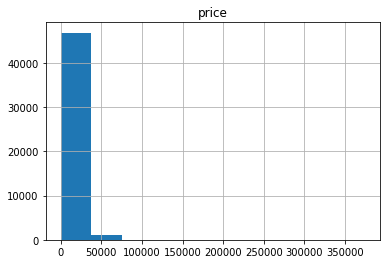

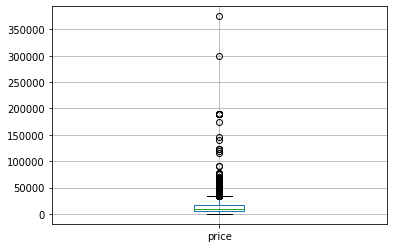

---vehicle_age---
(count    47873.000000
mean         9.051277
std          6.223285
min          0.000000
25%          4.528767
50%          7.958904
75%         12.542466
max        110.586301
Name: vehicle_age, dtype: float64, 2)


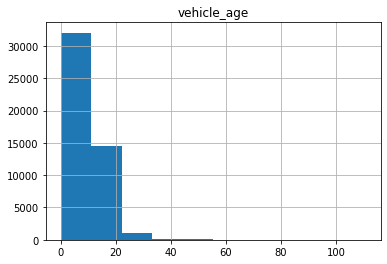

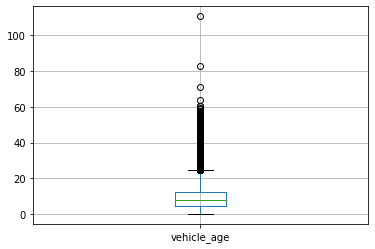

---odometer---
(count     47873.000000
mean     115072.448269
std       62403.380045
min           0.000000
25%       72757.000000
50%      114512.000000
75%      152862.000000
max      990000.000000
Name: odometer, dtype: float64, 2)


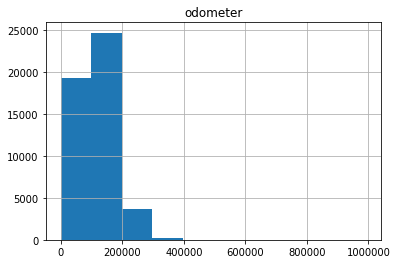

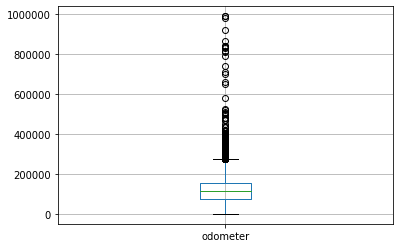

---cylinders---
(count    47873.000000
mean         6.120903
std          1.656108
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64, 2)


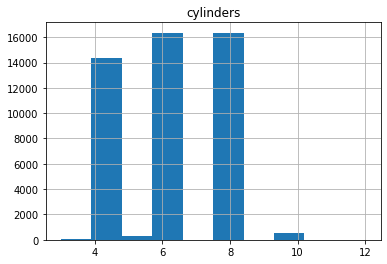

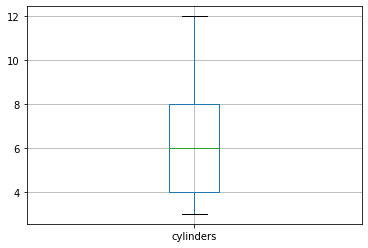

---condition---
(count    47873.000000
mean         2.638669
std          0.711402
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64, 2)


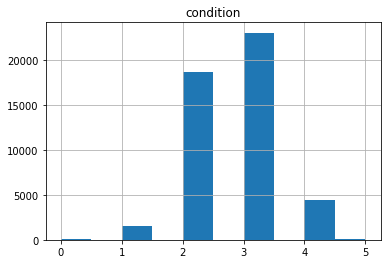

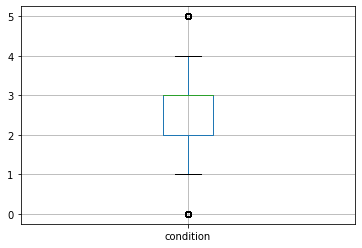

In [77]:

core_parameters= ['price', 'vehicle_age', 'odometer', 'cylinders', 'condition']
for cor in core_parameters:
    print('---{}---'.format(cor))
    print((data[cor].describe(), 2))
    data.hist(cor)
    plt.show()
    data.boxplot(cor)
    plt.show()



from the result we got we see it is a big range of values that part of them are outliers that change the distribution on the data so we need to cut out the outliers

## Study and treat outliers

we can have outliers in the price column that we should determine min as 150 because less is a very cheap bargen and max as 20000 for an expensive car.  another column with a possible outliers is the odometer thar stats with 0 km and goes up to 990000, must of cars dont drive more than 20000 so we should cut it

In [78]:

def find_min(par):
    q1=par.quantile(0.25)
    q3=par.quantile(0.75)
    irq=q3-q1
    x=q1-irq
    return x
price_min = find_min(data['price'])
vehicle_age_min = find_min(data['vehicle_age'])
odometer_min = find_min(data['odometer'])
cylinders_min = find_min(data['cylinders'])

In [79]:

def find_max(par):
    q1=par.quantile(0.25)
    q3=par.quantile(0.75)
    irq=q3-q1
    x=q3+irq
    return x
price_max = find_max(data['price'])
vehicle_age_max = find_max(data['vehicle_age'])
odometer_max = find_max(data['odometer'])
cylinders_max = find_max(data['cylinders'])

In [80]:


clean_data = data.query('price > @price_min and price<@price_max and vehicle_age<@vehicle_age_max and vehicle_age>@vehicle_age_min and odometer<@odometer_max and odometer>@odometer_min and cylinders<@cylinders_max')
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41527 entries, 0 to 51524
Data columns (total 19 columns):
price                   41527 non-null int64
model_year              41527 non-null int64
model                   41527 non-null object
condition               41527 non-null int64
cylinders               41527 non-null int64
fuel                    41527 non-null object
odometer                41527 non-null float64
transmission            41527 non-null object
type                    41527 non-null object
paint_color             41527 non-null object
is_4wd                  41527 non-null float64
date_posted             41527 non-null datetime64[ns]
days_listed             41527 non-null int64
publish_day_of_month    41527 non-null int64
publish_month           41527 non-null int64
publish_year            41527 non-null int64
publish_day_week        41527 non-null int64
vehicle_age             41527 non-null float64
mileage_year            41527 non-null float64
dtypes: dateti

In [81]:
clean_data.describe()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,publish_day_of_month,publish_month,publish_year,publish_day_week,vehicle_age,mileage_year
count,41527.000000,41527.000000,41527.000000,41527.000000,41527.000000,41527.000000,41527.000000,41527.000000,41527.000000,41527.000000,41527.000000,41527.000000,4.152700e+04
mean,10728.851133,2010.252534,2.648590,5.977581,112788.275676,0.467359,39.578660,15.466732,6.628410,2018.306764,3.003829,8.566396,inf
std,6958.011310,4.731104,0.686823,1.653234,52033.897780,0.498939,28.246895,8.731830,3.472278,0.461156,1.996930,4.740925,NaN
min,1.000000,1998.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2018.000000,0.000000,0.000000,0.000000e+00
25%,5000.000000,2007.000000,2.000000,4.000000,77478.000000,0.000000,19.000000,8.000000,3.000000,2018.000000,1.000000,4.821918,1.063855e+04
50%,8995.000000,2011.000000,3.000000,6.000000,115115.000000,0.000000,33.000000,15.000000,7.000000,2018.000000,3.000000,7.956164,1.425688e+04
75%,15000.000000,2014.000000,3.000000,8.000000,149245.000000,1.000000,53.000000,23.000000,10.000000,2019.000000,5.000000,12.008219,1.901509e+04
max,28799.000000,2019.000000,5.000000,10.000000,232960.000000,1.000000,271.000000,31.000000,12.000000,2019.000000,6.000000,20.550685,inf


In [82]:
print(clean_data.head())

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400        2011          bmw x5          2          6  gas  145000.0   
2   5500        2013  hyundai sonata          4          4  gas  110000.0   
3   1500        2003      ford f-150          1          8  gas  193850.0   
4  14900        2017    chrysler 200          3          4  gas   80903.0   
5  14990        2014    chrysler 300          3          6  gas   57954.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  \
0    automatic     SUV     unknown     1.0  2018-06-23           19   
2    automatic   sedan         red     0.0  2019-02-07           79   
3    automatic  pickup     unknown     0.0  2019-03-22            9   
4    automatic   sedan       black     0.0  2019-04-02           28   
5    automatic   sedan       black     1.0  2018-06-20           15   

   publish_day_of_month  publish_month  publish_year  publish_day_week  \
0                    23             

## Study core parameters without outliers

---price---
(count    41527.000000
mean     10728.851133
std       6958.011310
min          1.000000
25%       5000.000000
50%       8995.000000
75%      15000.000000
max      28799.000000
Name: price, dtype: float64, 2)


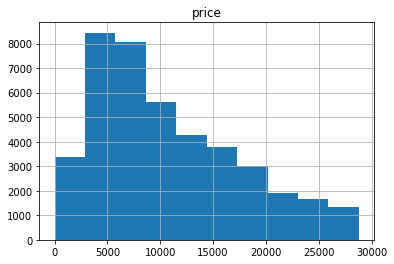

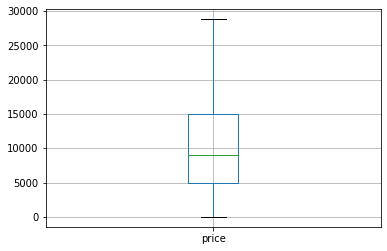

---vehicle_age---
(count    41527.000000
mean         8.566396
std          4.740925
min          0.000000
25%          4.821918
50%          7.956164
75%         12.008219
max         20.550685
Name: vehicle_age, dtype: float64, 2)


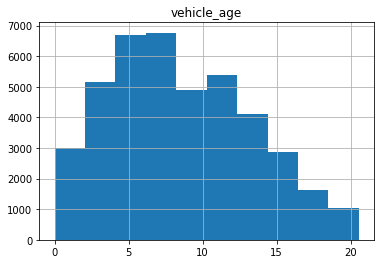

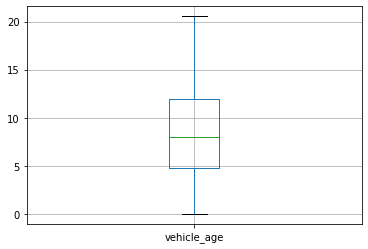

---odometer---
(count     41527.000000
mean     112788.275676
std       52033.897780
min           0.000000
25%       77478.000000
50%      115115.000000
75%      149245.000000
max      232960.000000
Name: odometer, dtype: float64, 2)


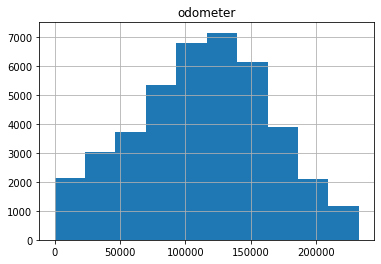

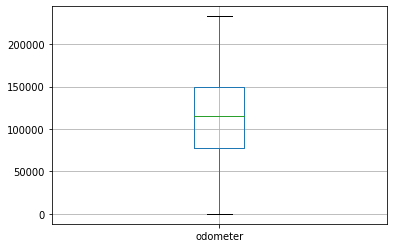

---cylinders---
(count    41527.000000
mean         5.977581
std          1.653234
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         10.000000
Name: cylinders, dtype: float64, 2)


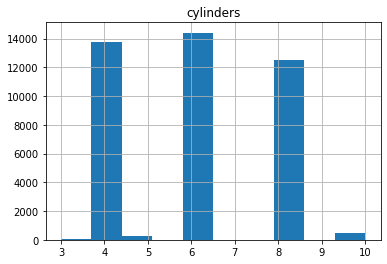

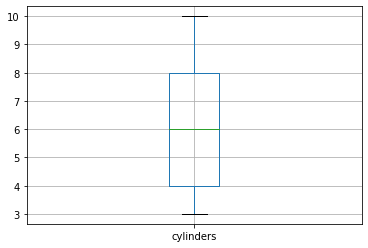

---condition---
(count    41527.000000
mean         2.648590
std          0.686823
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64, 2)


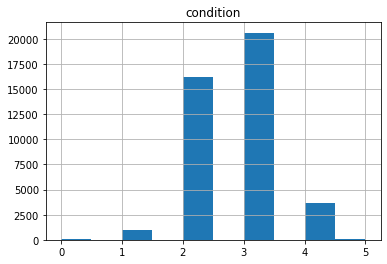

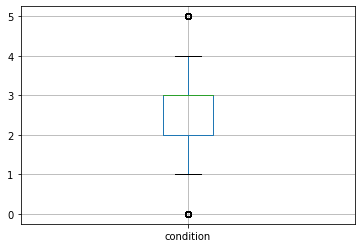

In [83]:
core_clean_parameters= ['price', 'vehicle_age', 'odometer', 'cylinders', 'condition']
for cor in core_clean_parameters:
    print('---{}---'.format(cor))
    print((clean_data[cor].describe(), 2))
    clean_data.hist(cor)
    plt.show()
    clean_data.boxplot(cor)
    plt.show()

after we filtered the outliers out of the data we can see  how the distribution is more accurate
and it is a lot easier to learn and analyze the data

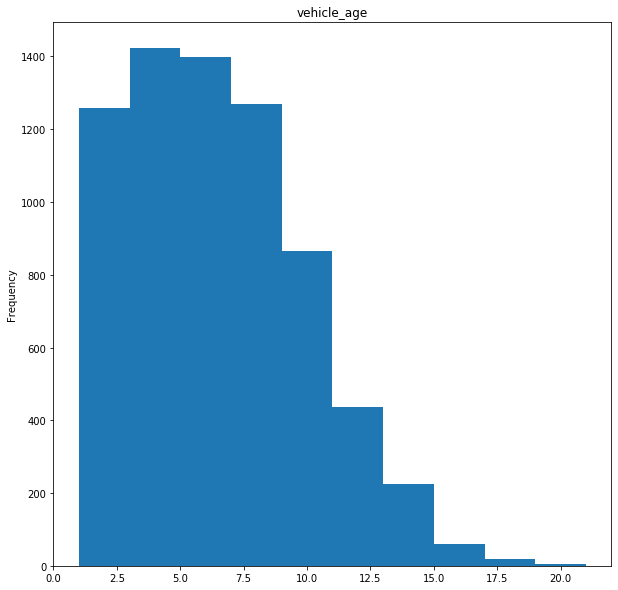

In [84]:
clean_data['vehicle_age'].value_counts().plot(kind='hist', figsize=(10,10), title='vehicle_age')
plt.show()

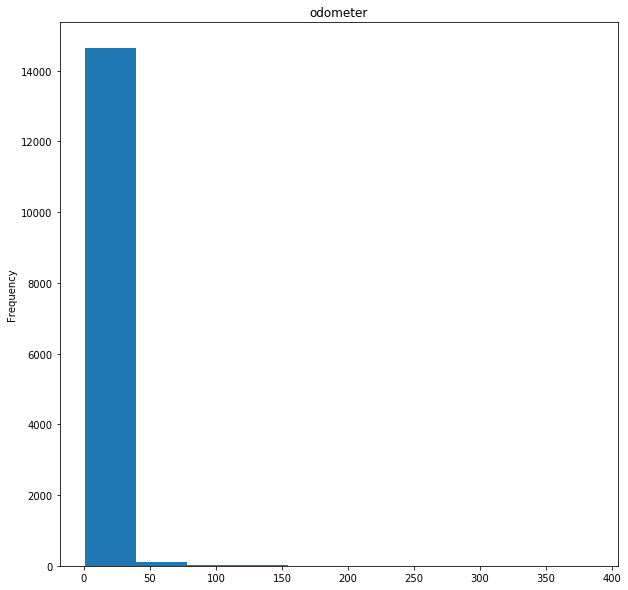

In [85]:
clean_data['odometer'].value_counts().plot(bins= 10, kind='hist', figsize=(10,10), title='odometer')
plt.show()

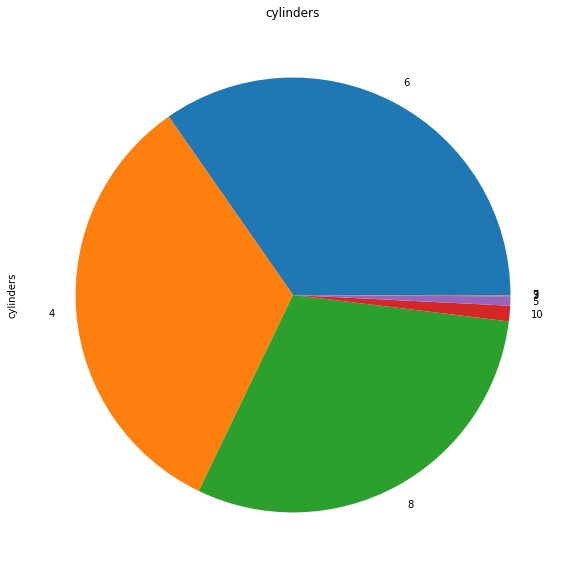

In [86]:
clean_data['cylinders'].value_counts().plot(kind='pie', figsize=(10,10), title='cylinders')
plt.show()

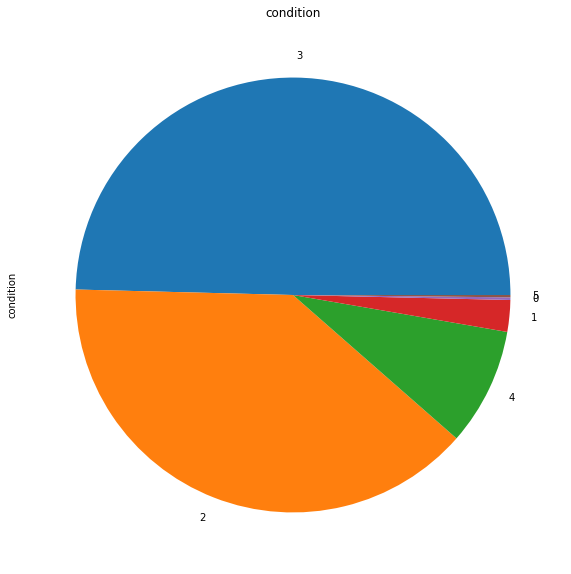

In [87]:
clean_data['condition'].value_counts().plot(kind='pie', figsize=(10,10), title='condition')
plt.show()

and a few pies for more easier eye looking at the data. 

## Ads lifetime


In [88]:
clean_data['days_listed'].describe()

count    41527.000000
mean        39.578660
std         28.246895
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

In [89]:
clean_data['days_listed'].median()

33.0

In [90]:
clean_data['days_listed'].value_counts(ascending=False)

18     798
20     779
24     774
19     750
23     750
      ... 
263      1
217      1
199      1
185      1
223      1
Name: days_listed, Length: 220, dtype: int64

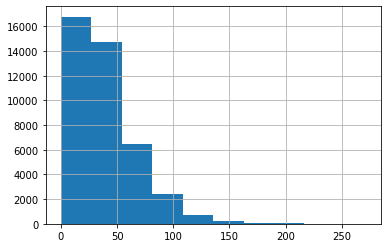

In [91]:
clean_data['days_listed'].hist()

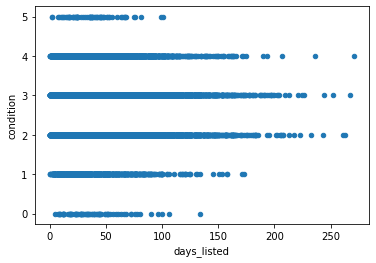

In [92]:
clean_data.plot(x='days_listed', y='condition', kind='scatter')
plt.show()

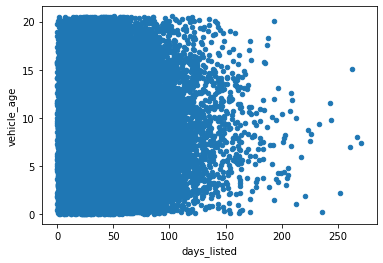

In [93]:
clean_data.plot(x='days_listed', y='vehicle_age', kind='scatter')
plt.show()

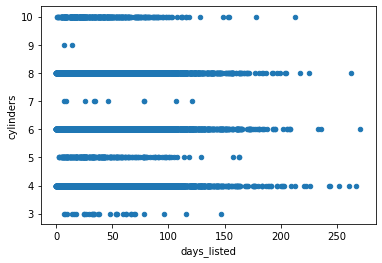

In [94]:
clean_data.plot(x='days_listed', y='cylinders', kind='scatter')
plt.show()

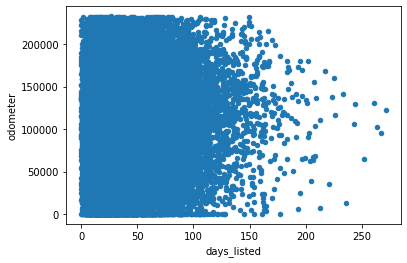

In [95]:
clean_data.plot(x='days_listed', y='odometer', kind='scatter')
plt.show()

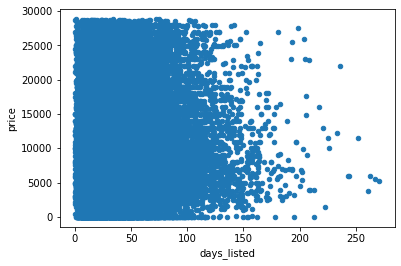

In [96]:
clean_data.plot(x='days_listed', y='price', kind='scatter')
plt.show()

In [97]:
clean_data.corr()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,publish_day_of_month,publish_month,publish_year,publish_day_week,vehicle_age,mileage_year
price,1.000000,0.499118,0.155687,0.292290,-0.407830,0.310564,-0.003875,-0.002258,-0.002077,-0.001184,-0.004253,-0.498682,0.061215
model_year,0.499118,1.000000,0.255182,-0.182198,-0.614080,-0.048868,-0.004267,0.000313,-0.008083,0.008796,-0.001234,-0.998256,0.148443
condition,0.155687,0.255182,1.000000,-0.088823,-0.269044,-0.002237,0.002022,-0.011452,-0.001551,0.004684,0.000296,-0.254525,0.017957
cylinders,0.292290,-0.182198,-0.088823,1.000000,0.147808,0.410416,-0.000699,-0.002148,0.001846,-0.001308,-0.006335,0.181926,-0.017040
odometer,-0.407830,-0.614080,-0.269044,0.147808,1.000000,0.080128,0.006533,-0.004918,0.006735,-0.001789,0.005204,0.613448,-0.040964
is_4wd,0.310564,-0.048868,-0.002237,0.410416,0.080128,1.000000,0.002714,-0.004352,0.004140,-0.002269,0.005068,0.048809,0.013479
days_listed,-0.003875,-0.004267,0.002022,-0.000699,0.006533,0.002714,1.000000,0.000332,-0.009780,0.010481,0.002524,0.004686,-0.006227
publish_day_of_month,-0.002258,0.000313,-0.011452,-0.002148,-0.004918,-0.004352,0.000332,1.000000,0.033802,-0.062475,0.003782,0.000718,-0.022362
publish_month,-0.002077,-0.008083,-0.001551,0.001846,0.006735,0.004140,-0.009780,0.033802,1.000000,-0.817116,0.003942,-0.010196,-0.042088
publish_year,-0.001184,0.008796,0.004684,-0.001308,-0.001789,-0.002269,0.010481,-0.062475,-0.817116,1.000000,-0.006139,0.038374,0.030187


from studdying the life time of ads we can see that there is almost no influance that we can detect between the car parameters like age or miles to the life of the ad. a ad avrage life time is 33 days that are about a month to a car to be sold and removed from the site. there is no way for us to know exactly what made a ad be shorter or longer then the avrage time but we can see a slite dellay of selling if the condition of a car is bad it looks a beat longer time to sell 

## Average price per each type of vehicle

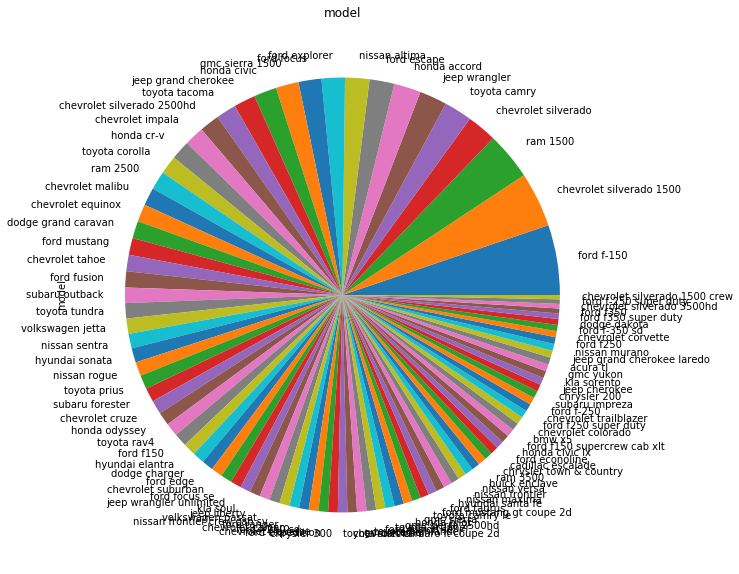

In [98]:
clean_data['model'].sort_values().value_counts().plot(kind='pie', figsize=(10,10), title='model')
plt.show()

we see that the must sold models in our list are ford f-150, ram 1500 and chevrolet silverado 1500. now i see we have a duplicat issue with the car models because names are a beat diffrent but from what i see they dont change the big models they just increast them 

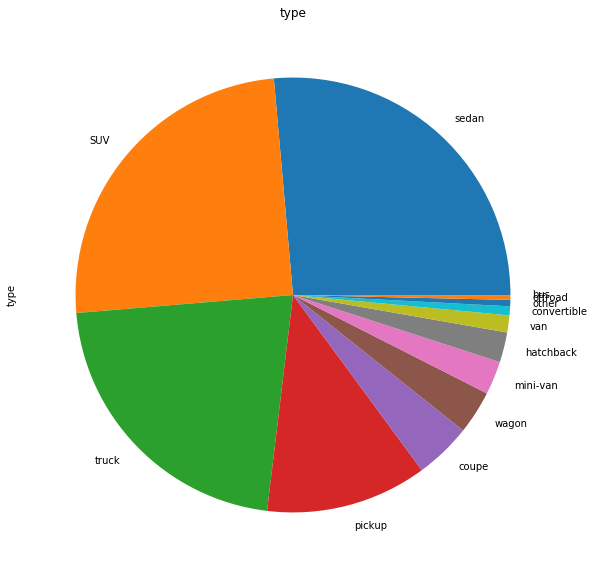

In [99]:
clean_data['type'].sort_values().value_counts().plot(kind='pie', figsize=(10,10), title='type')
plt.show()

In [100]:
clean_data.pivot_table(index='type', values='price', aggfunc=['count', 'sum', 'mean', 'median'])

,count,sum,mean,median
,price,price,price,price
type,,,,
SUV,10348,104942829,10141.363452,8900.0
bus,7,40375,5767.857143,4995.0
convertible,278,3535195,12716.528777,12995.0
coupe,1747,23672651,13550.458500,13800.0
hatchback,925,6370459,6886.982703,5995.0
mini-van,1032,8380869,8120.997093,6525.0
offroad,142,2068728,14568.507042,12949.5
other,195,1914398,9817.425641,8950.0


we see that the 3 must sold types of cars are suv, sedan and truck and we see that avrage price is diffrent for every type. suv avg price is 10100 $ and its higher then the median that is only 8900 $, sedan avg price is 7000 $ and the truck avg price is 14000 $

## Price factors

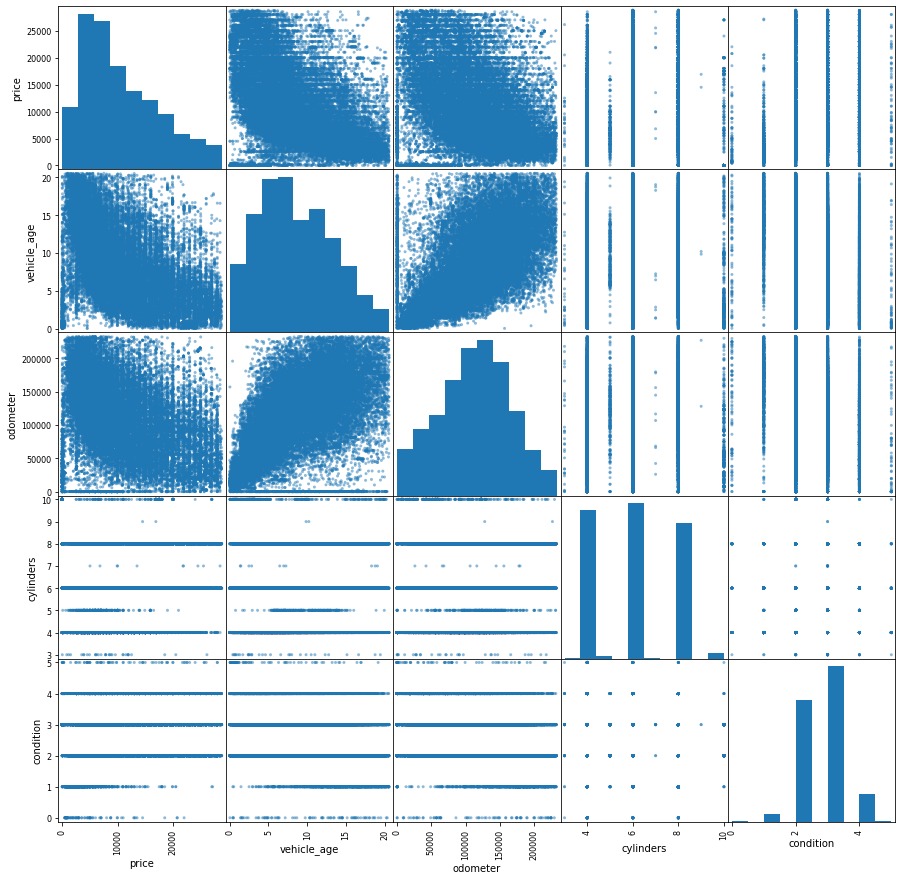

In [101]:
pd.plotting.scatter_matrix(clean_data[core_clean_parameters], figsize=(15, 15))
plt.show()

In [102]:
data_suv= clean_data.query('type=="SUV"')
data_suv_p_c = data_suv.pivot_table(index='paint_color', values='price', aggfunc=('count', 'mean', 'median'))
data_suv_p_c.query('count>50')

,count,mean,median
paint_color,,,
black,1804.0,11430.201774,10837.0
blue,885.0,8475.596610,6995.0
brown,301.0,8637.734219,7500.0
custom,265.0,8965.954717,7999.0
green,339.0,8578.569322,6499.0
grey,1015.0,9913.690640,8500.0
orange,69.0,14791.942029,16900.0
red,768.0,9979.457031,8000.0
silver,1365.0,9588.043223,8300.0


In [103]:
data_suv_pc = data_suv.pivot_table(index='condition', values='price', aggfunc=('count', 'mean', 'median'))
data_suv_pc.query('count>50')

,count,mean,median
condition,,,
1,204.0,3039.965686,2500.0
2,3598.0,8915.702613,7340.0
3,5589.0,10806.497048,9900.0
4,933.0,12571.302251,11995.0


In [104]:
data_suv_p_t = data_suv.pivot_table(index='transmission', values='price', aggfunc=('count', 'mean', 'median'))
data_suv_p_t.query('count>50')

,count,mean,median
transmission,,,
automatic,9828.0,10108.998474,8750.0
manual,376.0,12163.513298,11995.0
other,144.0,7070.215278,4994.0


In [105]:
data_suv.pivot_table(index='odometer', values='price', aggfunc=('count', 'mean', 'median'))

,count,mean,median
odometer,,,
0.0,20.0,8926.650000,5941.5
1.0,15.0,1104.133333,1.0
2.0,1.0,3600.000000,3600.0
10.0,1.0,475.000000,475.0
14.0,4.0,326.000000,326.0
...,...,...,...
231914.0,1.0,1995.000000,1995.0
232000.0,3.0,4400.000000,2700.0
232232.0,1.0,2500.000000,2500.0


In [106]:
data_suv.pivot_table(index='vehicle_age', values='price', aggfunc=('count', 'mean', 'median'))

,count,mean,median
vehicle_age,,,
0.002740,1.0,23500.0,23500.0
0.010959,2.0,24241.5,24241.5
0.013699,2.0,17949.0,17949.0
0.016438,2.0,11950.5,11950.5
0.019178,1.0,24588.0,24588.0
...,...,...,...
20.498630,2.0,2622.5,2622.5
20.501370,1.0,855.0,855.0
20.515068,1.0,6500.0,6500.0


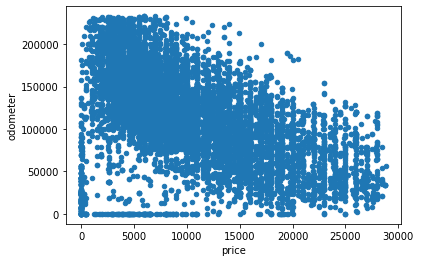

In [107]:

data_suv.plot(x='price', y='odometer', kind='scatter')
plt.show()

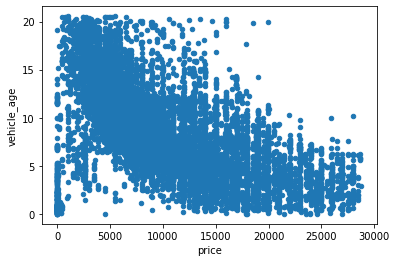

In [108]:
data_suv.plot(x='price', y='vehicle_age', kind='scatter')
plt.show()

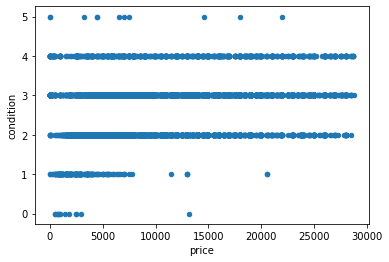

In [109]:
data_suv.plot(x='price', y='condition', kind='scatter')
plt.show()

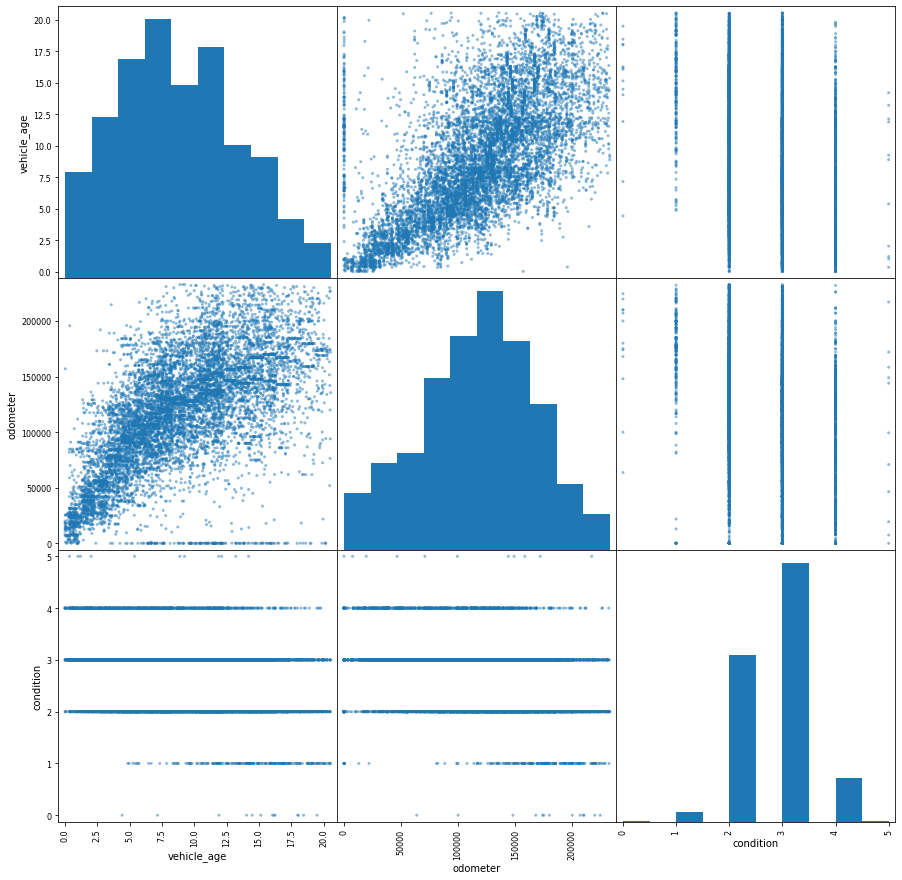

In [110]:
suv_parameters = ['vehicle_age', 'odometer', 'condition']
pd.plotting.scatter_matrix(data_suv[suv_parameters], figsize=(15, 15))
plt.show()

In [138]:
data_suv['transmission'].value_counts()

automatic    9828
manual        376
other         144
Name: transmission, dtype: int64

here we can see that transmission values are all above 50 so no problem to plot the columns data

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


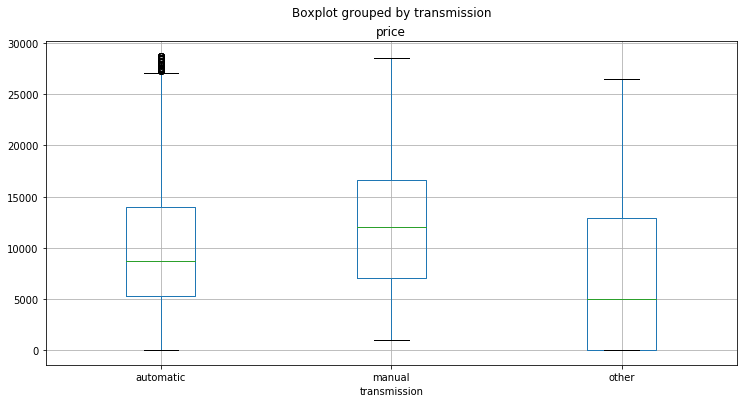

In [139]:
data_suv.boxplot(by='transmission', column=['price'], figsize=(12, 6))

plt.show()

In [140]:
data_suv['paint_color'].value_counts()

unknown    1871
black      1804
white      1597
silver     1365
grey       1015
blue        885
red         768
green       339
brown       301
custom      265
orange       69
yellow       38
purple       31
Name: paint_color, dtype: int64

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


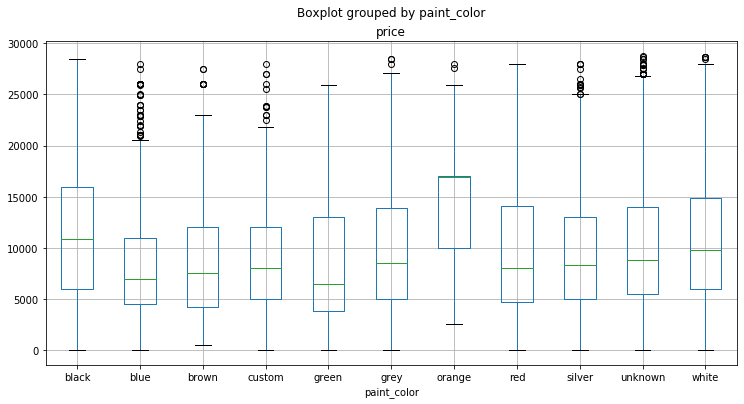

In [160]:
data_suv = data_suv.query('paint_color != "yellow" and paint_color != "purple"')
data_suv.boxplot(by='paint_color', column=['price'], figsize=(12, 6))
plt.show()

this is the suv/price studdy. we can see that there is no influance of the parameters on price except from a slite influance between the age and price but that should be Obviously that every year goes by the value goes down

In [145]:
data_sedan= clean_data.query('type=="sedan"')
data_sedan_p_c = data_sedan.pivot_table(index='paint_color', values='price', aggfunc=('count', 'mean', 'median'))
data_sedan_p_c.query('count>50')

,count,mean,median
paint_color,,,
black,1637.0,7556.073305,6985.0
blue,1112.0,6727.108813,5899.5
brown,221.0,5474.176471,4500.0
custom,260.0,6447.253846,5500.0
green,165.0,5085.496970,3995.0
grey,1467.0,7148.751875,6495.0
red,859.0,7026.845169,5995.0
silver,1873.0,6938.807261,5995.0
unknown,1961.0,7059.870984,6195.0


In [146]:
data_sedan_pc = data_sedan.pivot_table(index='condition', values='price', aggfunc=('count', 'mean', 'median'))
data_sedan_pc.query('count>50')

,count,mean,median
condition,,,
1,222.0,2257.319820,1800.0
2,3827.0,5978.758819,5000.0
3,5638.0,7576.099681,6990.0
4,1206.0,9097.392206,8150.0


In [147]:
data_sedan_p_t = data_sedan.pivot_table(index='transmission', values='price', aggfunc=('count', 'mean', 'median'))
data_sedan_p_t.query('count>50')

,count,mean,median
transmission,,,
automatic,10332.0,7176.051878,6299.0
manual,512.0,5637.927734,4725.0
other,121.0,4431.884298,3995.0


In [148]:
data_sedan.pivot_table(index='odometer', values='price', aggfunc=('count', 'mean', 'median'))

,count,mean,median
odometer,,,
0.0,55.0,7646.181818,6900.0
1.0,1.0,4500.000000,4500.0
6.0,1.0,23431.000000,23431.0
7.0,1.0,18000.000000,18000.0
10.0,2.0,384.000000,384.0
...,...,...,...
230000.0,5.0,2539.200000,2998.0
230068.0,1.0,1950.000000,1950.0
231000.0,4.0,2425.000000,2100.0


In [149]:
data_sedan.pivot_table(index='vehicle_age', values='price', aggfunc=('count', 'mean', 'median'))

,count,mean,median
vehicle_age,,,
0.002740,1.0,17988.0,17988.0
0.005479,1.0,1.0,1.0
0.008219,1.0,20988.0,20988.0
0.013699,1.0,17998.0,17998.0
0.016438,1.0,1.0,1.0
...,...,...,...
20.358904,1.0,2695.0,2695.0
20.400000,1.0,2800.0,2800.0
20.484932,1.0,1575.0,1575.0


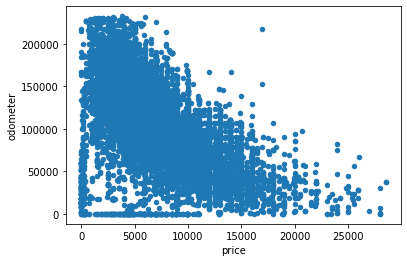

In [150]:
data_sedan.plot(x='price', y='odometer', kind='scatter')
plt.show()

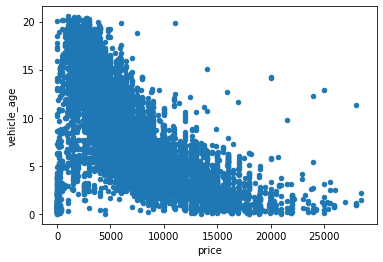

In [151]:
data_sedan.plot(x='price', y='vehicle_age', kind='scatter')
plt.show()

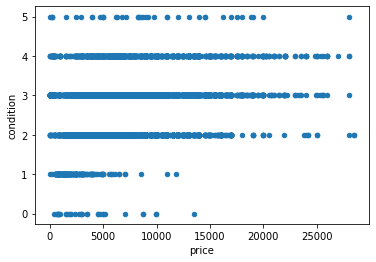

In [152]:
data_sedan.plot(x='price', y='condition', kind='scatter')
plt.show()

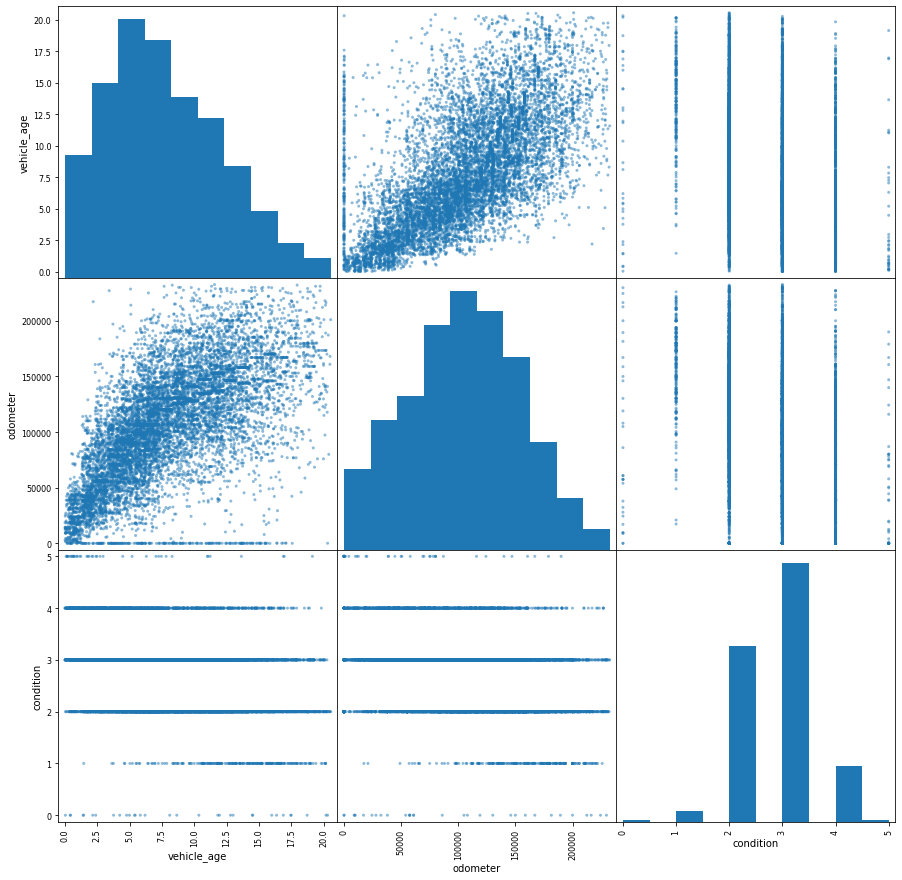

In [153]:
sedan_parameters = ['vehicle_age', 'odometer', 'condition']
pd.plotting.scatter_matrix(data_sedan[sedan_parameters], figsize=(15, 15))
plt.show()

In [156]:
data_sedan['paint_color'].value_counts()

unknown    1961
silver     1873
black      1637
grey       1467
white      1362
blue       1112
red         859
custom      260
brown       221
green       165
purple       22
yellow       18
orange        8
Name: paint_color, dtype: int64

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


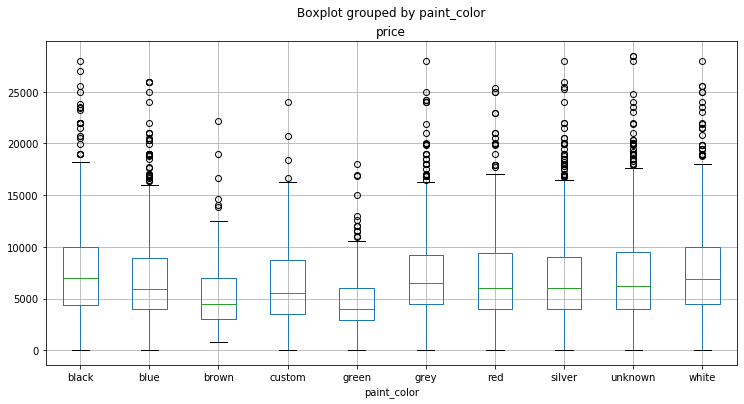

In [157]:
data_sedan=data_sedan.query('paint_color != "purple" and paint_color != "yellow" and paint_color != "orange"')
data_sedan.boxplot(by='paint_color', column=['price'], figsize=(12, 6))

plt.show()

In [158]:
data_sedan['transmission'].value_counts()

automatic    10288
manual         511
other          118
Name: transmission, dtype: int64

also here we dont need to get rid of data

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


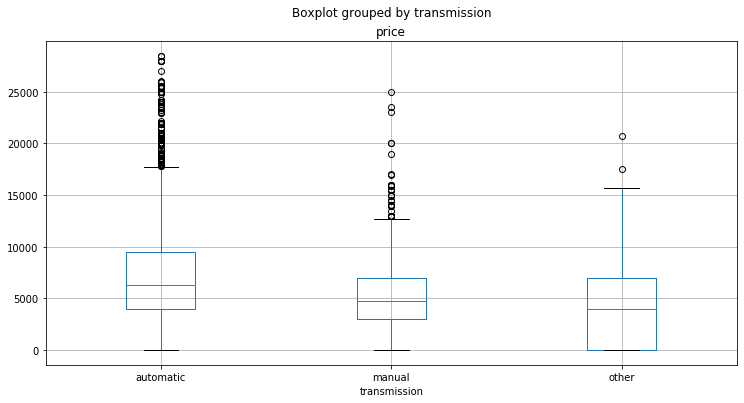

In [159]:
data_sedan.boxplot(by='transmission', column=['price'], figsize=(12, 6))

plt.show()

also in sedan/price studdy we see the same as in suv

## General conclusion



here we are at the general conclusion. lets have a short brief of the work and then give our conclusion. in the beginning stage we got the data and sorted out diffrent values that were missing like color and is_4wd and we got rid of 9% of the data. then the next step was enreaching the data for easier and more forwood studdy. then we learned the dataset and made histegrams and boxplots and we saw outliers and got rid of them. with the clean data we learned our data and here are our conclusions- the price of a car is not depense on almost any of the parameters we have or that our data isnt enough to get down to it. the only thing that influances is the age of the car that dosent deppend on model or color and gets lower and lower until its an antic car and gets its price back. even the miles the car drove is almost not influance on the price. suv's sale more and most of the cars are automatic but its nothing that we can learn about the price. another issue is that the price is what is added bud it is not the endled price after negotiation so we dont know at the end what is the price and what parameter made the change. maybe with more data and accurated details we can have a better studdy 